In [1]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class CustomEnv(gym.Env):
    metadata = {
        "render_modes": ["human", "ansi"],
        "render_fps": 4
    }

    def __init__(self, n_rows=10, n_cols=10, goal_state=None, render_mode=None):
        super(CustomEnv, self).__init__()

        self.n_rows = n_rows
        self.n_cols = n_cols
        self.n_states = n_rows * n_cols
        self.n_actions = 4

        self.observation_space = spaces.Discrete(self.n_states)
        self.action_space = spaces.Discrete(self.n_actions)

        if goal_state is None:
            self.goal_state = (n_rows - 1, n_cols - 1)
        else:
            self.goal_state = goal_state

        self.state = 0
        self.render_mode = render_mode


    def reset(self,seed=None, options=None):
        super().reset(seed=seed)
        if options is not None:
            self.goal_state = options.get('goal_state', self.goal_state)
        self.state = 0
        return self.state,{}

    def step(self, action):
        row,col = divmod(self.state, self.n_cols)
        if action == 0:
            row = max(0, row - 1)
        elif action == 1:
            row = min(self.n_rows - 1, row + 1)
        elif action == 2:
            col = max(0, col - 1)
        elif action == 3:
            col = min(self.n_cols - 1, col + 1)
        self.state = row * self.n_cols + col

        if self.state == self.goal_state[0] * self.n_cols + self.goal_state[1] :
            reward = 100
            done = True
        else:
            reward = -1
            done = False

        return self.state, reward, done, False, {}

    def render(self):
        if self.render_mode == "human":
            fig,ax = plt.subplots()
            ax.set_title("Custom Environment")
            ax.set_xlabel("Columns")
            ax.set_ylabel("Rows")
            ax.set_xticks(np.arange(self.n_cols+1)-0.5, minor=True)
            ax.set_yticks(np.arange(self.n_rows+1)-0.5, minor=True)
            ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

            for i in range(self.n_rows):
                for j in range(self.n_cols):
                    if (i, j) == self.goal_state:
                        ax.text(j, i, 'G', ha='center', va='center', color='green')
                    elif i * self.n_cols + j == self.state:
                        ax.text(j, i, 'A', ha='center', va='center', color='red')
                    else:
                        ax.text(j, i, '.', ha='center', va='center', color='black')
            plt.gca().invert_yaxis()
            plt.show()
        else: # self.render_mode == "ansi"
            grid = np.full((self.n_rows, self.n_cols), '.',dtype=str)
            # Convert goal_state tuple to linear index for comparison with self.state
            goal_linear_state = self.goal_state[0] * self.n_cols + self.goal_state[1]
            goal_row, goal_col = divmod(goal_linear_state, self.n_cols)
            grid[goal_row, goal_col] = 'G'

            agent_row, agent_col = divmod(self.state, self.n_cols)
            grid[agent_row, agent_col] = 'A'

            output_str = ""
            for row in range(self.n_rows):
                output_str += ("+" + "---" * self.n_cols + "+\n")
                output_str += ("|" + "".join([f" {grid[row, col]} |" for col in range(self.n_cols)]) + "\n")
            output_str += ("+" + "---" * self.n_cols + "+")
            print(output_str)

In [23]:
gym.register("CustomEnv-v0", entry_point=CustomEnv,max_episode_steps=25)


c:\Users\user\anaconda3\envs\ai_env\lib\site-packages\gymnasium\envs\registration.py:636: UserWarning: WARN: Overriding environment CustomEnv-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Initial Observation: 0


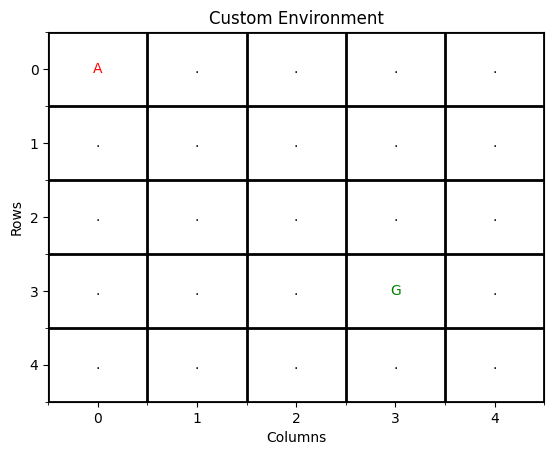

In [ ]:
# --- Example Usage ---
# Create the environment with 5x5 grid and goal at (3,3)
env = gym.make("CustomEnv-v0", n_rows=5, n_cols=5, render_mode="human")
obs, info = env.reset()

print(f"Initial Observation: {obs}")
env.render() # Render the initial state

In [25]:
def get_action_name(action):
    if action == 0:
        return "UP"
    elif action == 1:
        return "DOWN"
    elif action == 2:
        return "LEFT"
    elif action == 3:
        return "RIGHT"
    else:
        return "UNKNOWN"

In [27]:
env = gym.make("CustomEnv-v0", n_rows=5, n_cols=5)
obs, info = env.reset()

print(f"Initial Observation: {obs}")
env.render() # Render the initial state

Initial Observation: 0
+---------------+
| A | . | . | . | . |
+---------------+
| . | . | . | . | . |
+---------------+
| . | . | . | . | . |
+---------------+
| . | . | . | . | . |
+---------------+
| . | . | . | . | G |
+---------------+


In [29]:

terminated = False
truncated = False
while not terminated and not truncated:

    action = env.action_space.sample()  # Random action
    obs, reward, terminated, truncated, info = env.step(action)
    print(f"Action: {get_action_name(action)}, Observation: {obs}, Reward: {reward}")
    
    env.render()  # Render the current state

env.close()
print("Episode finished.")   

Action: RIGHT, Observation: 22, Reward: -1
+---------------+
| . | . | . | . | . |
+---------------+
| . | . | . | . | . |
+---------------+
| . | . | . | . | . |
+---------------+
| . | . | . | . | . |
+---------------+
| . | . | A | . | G |
+---------------+
Episode finished.
